In [9]:
import pandas as pd
%matplotlib inline

In [5]:
data = pd.read_csv("13zpallagi.csv")



In [6]:
xcdata = data[data.zipcode == 0]
mortCol = xcdata.columns.get_loc("A19300")
mortCol

67

In [19]:
type(xcdata)
xcdata.columns
agiToMor = xcdata[['STATE','STATEFIPS','N1','agi_stub','A19300']].copy()

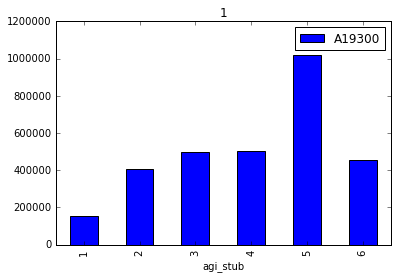

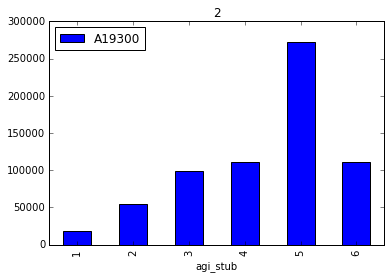

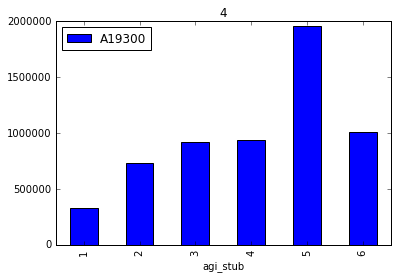

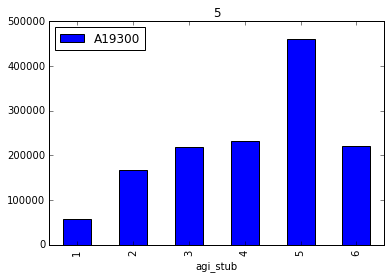

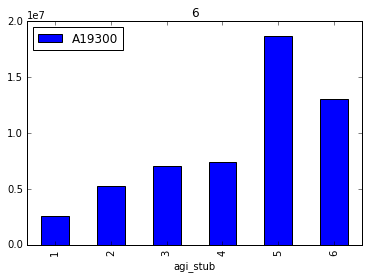

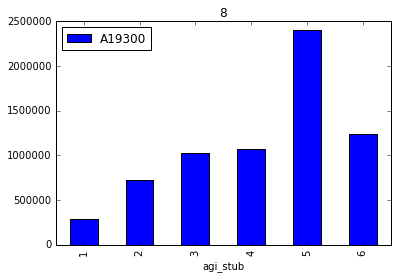

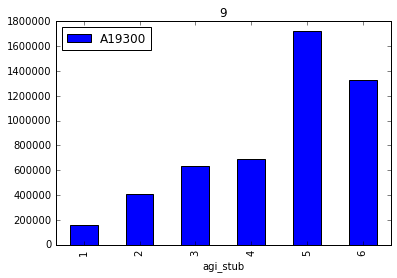

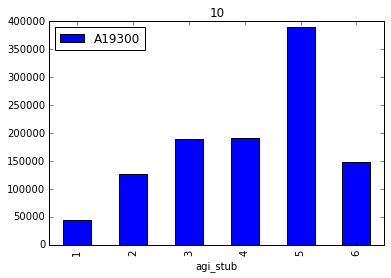

In [227]:
agiToMor = xcdata[['STATE','STATEFIPS','N1','agi_stub','A19300']].copy()

for x in pd.unique(agiToMor.STATEFIPS):
    df = agiToMor[agiToMor.STATEFIPS==x]
    df.plot(x='agi_stub',y='A19300',kind='bar',title=x)
    if(x==10):
        break

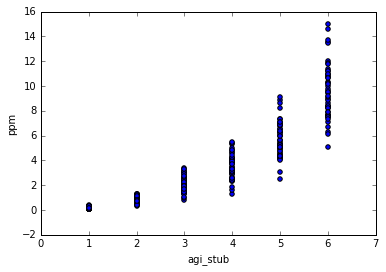

In [228]:
agiToMor['ppm'] = agiToMor['A19300']/agiToMor['N1']
#ppm is percapita mortgage intrest payments
agiToMor[0:10]
agiToMor.plot.scatter(x='agi_stub',y='ppm')

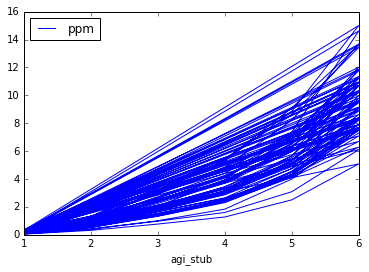

In [229]:
agiToMor.plot.line(x='agi_stub',y='ppm')

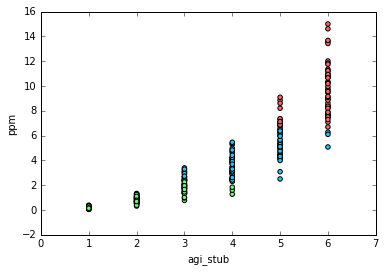

In [230]:
#The Above plot shows that we can divide the States into roughly 3 clusters
from sklearn.cluster import KMeans
from ggplot import *
kmeansModel = KMeans(n_clusters = 3)
my_colors = ['b','r','g']
kmeansModel.fit(agiToMor[['agi_stub','ppm']])
colors = ([([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1])[i] for i in kmeansModel.labels_.tolist()])
agiToMor['cluster'] = kmeansModel.labels_.tolist()
agiToMor[0:20]
agiToMor.plot.scatter(x='agi_stub',y='ppm',c=colors)

# The standard k-means algorithm isn't directly applicable here as the agi_stub is categorical data. A Euclidean distance function
# on such a space isn't really meaningful. One way to solve this is to perform clusterin on each agi_stub. But the clusters created
# in such a way are independent ppm values of previous or later agi values.

In [231]:

agiToMor['agi-1'] = agiToMor.apply(lambda row: 1 if row['agi_stub'] == 1 else  0,axis=1)
agiToMor['agi-2'] = agiToMor.apply(lambda row: 2 if row['agi_stub'] == 2 else  0,axis=1)
agiToMor['agi-3'] = agiToMor.apply(lambda row: 3 if row['agi_stub'] == 3 else  0,axis=1)
agiToMor['agi-4'] = agiToMor.apply(lambda row: 4 if row['agi_stub'] == 4 else  0,axis=1)
agiToMor['agi-5'] = agiToMor.apply(lambda row: 5 if row['agi_stub'] == 5 else  0,axis=1)
agiToMor['agi-6'] = agiToMor.apply(lambda row: 6 if row['agi_stub'] == 6 else  0,axis=1)


In [90]:
agiToMor[0:]

,STATE,STATEFIPS,N1,agi_stub,A19300,avgMort,ppm,cluster,agi-1,agi-2,agi-3,agi-4,agi-5,agi-6,cluster-cat
0,AL,1,870380,1,151005,0.173493,0.173493,1,1,0,0,0,0,0,0
1,AL,1,490960,2,405101,0.825120,0.825120,1,0,2,0,0,0,0,0
2,AL,1,258810,3,498801,1.927286,1.927286,1,0,0,3,0,0,0,0
3,AL,1,163290,4,505429,3.095284,3.095284,2,0,0,0,4,0,0,2
4,AL,1,192050,5,1019585,5.308956,5.308956,2,0,0,0,0,5,0,2
5,AL,1,46890,6,452100,9.641715,9.641715,0,0,0,0,0,0,6,1
3456,AK,2,121230,1,17634,0.145459,0.145459,1,1,0,0,0,0,0,0
3457,AK,2,80690,2,54872,0.680035,0.680035,1,0,2,0,0,0,0,0
3458,AK,2,51340,3,98766,1.923763,1.923763,1,0,0,3,0,0,0,0
3459,AK,2,35610,4,110363,3.099214,3.099214,2,0,0,0,4,0,0,2


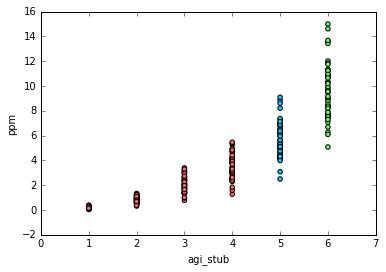

In [91]:
test = agiToMor[['agi-1','agi-2','agi-3','agi-4','agi-5','agi-6','ppm']].copy()
kmeansModel.fit(test)
colors = ([([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1])[i] for i in kmeansModel.labels_.tolist()])
agiToMor['cluster-cat'] = kmeansModel.labels_.tolist()
agiToMor[0:20]
agiToMor.plot.scatter(x='agi_stub',y='ppm',c=colors)

In [237]:
us_complete = pd.DataFrame()
for x in range(1,7):
    returns = (agiToMor[agiToMor['agi_stub']==x])['N1'].sum(axis=0)
    mortvalue = (agiToMor[agiToMor['agi_stub']==x])['A19300'].sum(axis=0)
    us_complete = us_complete.append(pd.DataFrame([['US',100,returns,x,mortvalue,mortvalue/returns]],columns=('STATE','STATEIPS','N1','agi_stub','A19300','ppm')))
    
us_complete

,STATE,STATEIPS,N1,agi_stub,A19300,ppm
0,US,100,56176690,1,12248397,0.218033
0,US,100,34052540,2,30678593,0.900919
0,US,100,19268220,3,42522241,2.206859
0,US,100,12364340,4,44923348,3.633299
0,US,100,16407620,5,101534126,6.188230
0,US,100,5455510,6,59148874,10.842043


In [245]:
def getClusterCentreToTag (centres) :
    minC = min(centres)
    maxC = max(centres)
    k = [i for i in [0,1,2] if i not in [centres.index(minC),centres.index(maxC) ]][0]
    centreToTagMap = {centres.index(minC):0,centres.index(maxC):2,k:1}
    return centreToTagMap
for agi in range(1,7) : 
        agiSlice = agiToMor[agiToMor['agi_stub']==agi]
        kmeansModel.fit_predict(agiSlice[['ppm']])
        clusCentresToTag = getClusterCentreToTag(kmeansModel.cluster_centers_.tolist())
        relatedClusterLabels = [clusCentresToTag[i] for i in  kmeansModel.labels_.tolist()]
        agiToMor.loc[agiToMor['agi_stub']==agi,'Ncluster'] = relatedClusterLabels
        
        #Predicting cluster of whole US
        predictions = kmeansModel.predict((us_complete[us_complete['agi_stub']==agi])['ppm'])
        relatedClusterLabels = [clusCentresToTag[i] for i in  predictions]
        us_complete.loc[us_complete['agi_stub']==agi,'Ncluster'] = relatedClusterLabels


C:\Users\akhilch\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akhilch\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\akhilch\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fe

,STATE,STATEIPS,N1,agi_stub,A19300,ppm,Ncluster
0,US,100,56176690,1,12248397,0.218033,1
0,US,100,34052540,2,30678593,0.900919,1
0,US,100,19268220,3,42522241,2.206859,1
0,US,100,12364340,4,44923348,3.633299,1
0,US,100,16407620,5,101534126,6.188230,1
0,US,100,5455510,6,59148874,10.842043,1


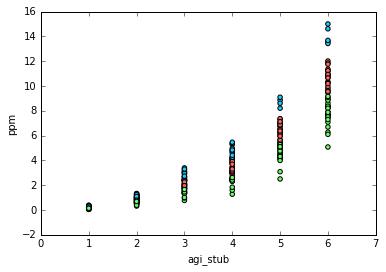

In [219]:
agiToMor[['agi_stub','STATE','Ncluster','ppm']]
colors = ([([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1])[int(i)] for i in agiToMor['Ncluster'].tolist()])
agiToMor.plot.scatter(x='agi_stub',y='ppm',c=colors)

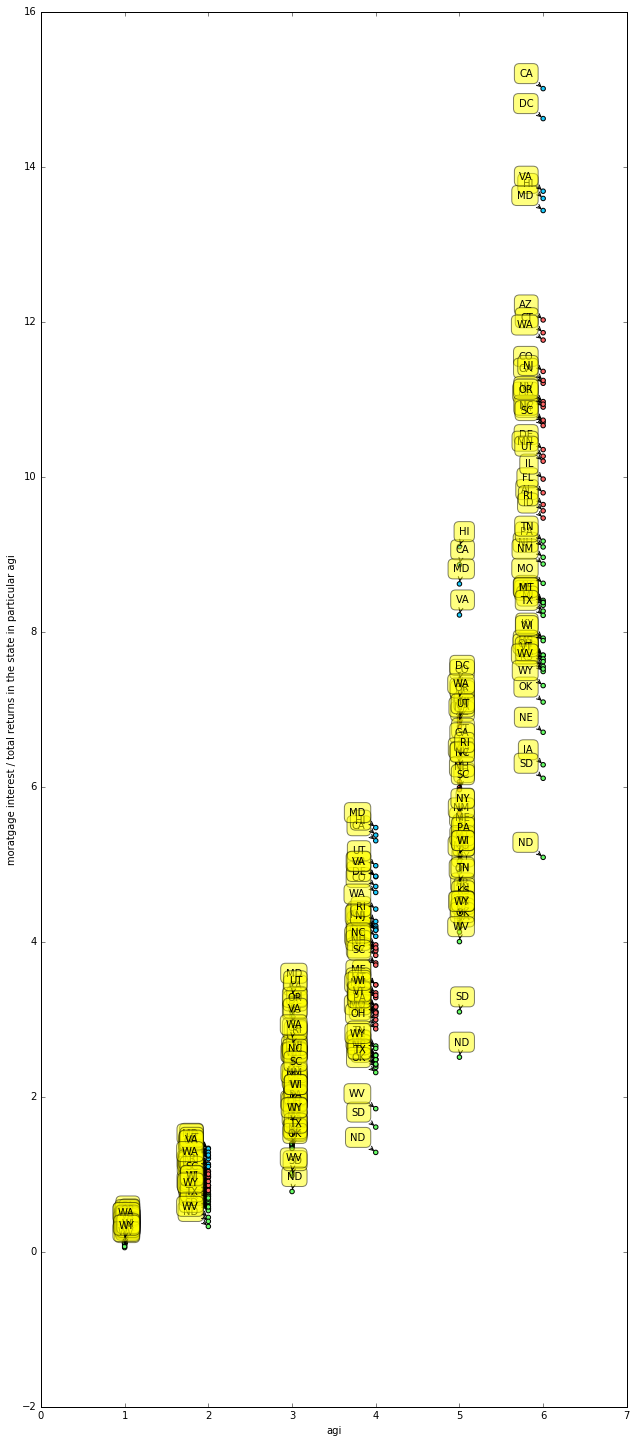

In [220]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 25, forward=True)
ax.scatter(agiToMor['agi_stub'], agiToMor['ppm'],c=colors)
ax.set_ylabel('moratgage interest / total returns in the state in particular agi')
ax.set_xlabel('agi')
xytext = (-10,10)
for label, x, y in zip(agiToMor['STATE'], agiToMor['agi_stub'], agiToMor['ppm']):
     xytext = (10,10) if xytext == (-10,10) else (-10,10)
     plt.annotate(label,xy = (x, y), xytext = xytext,
        textcoords = 'offset points', ha = "right", va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

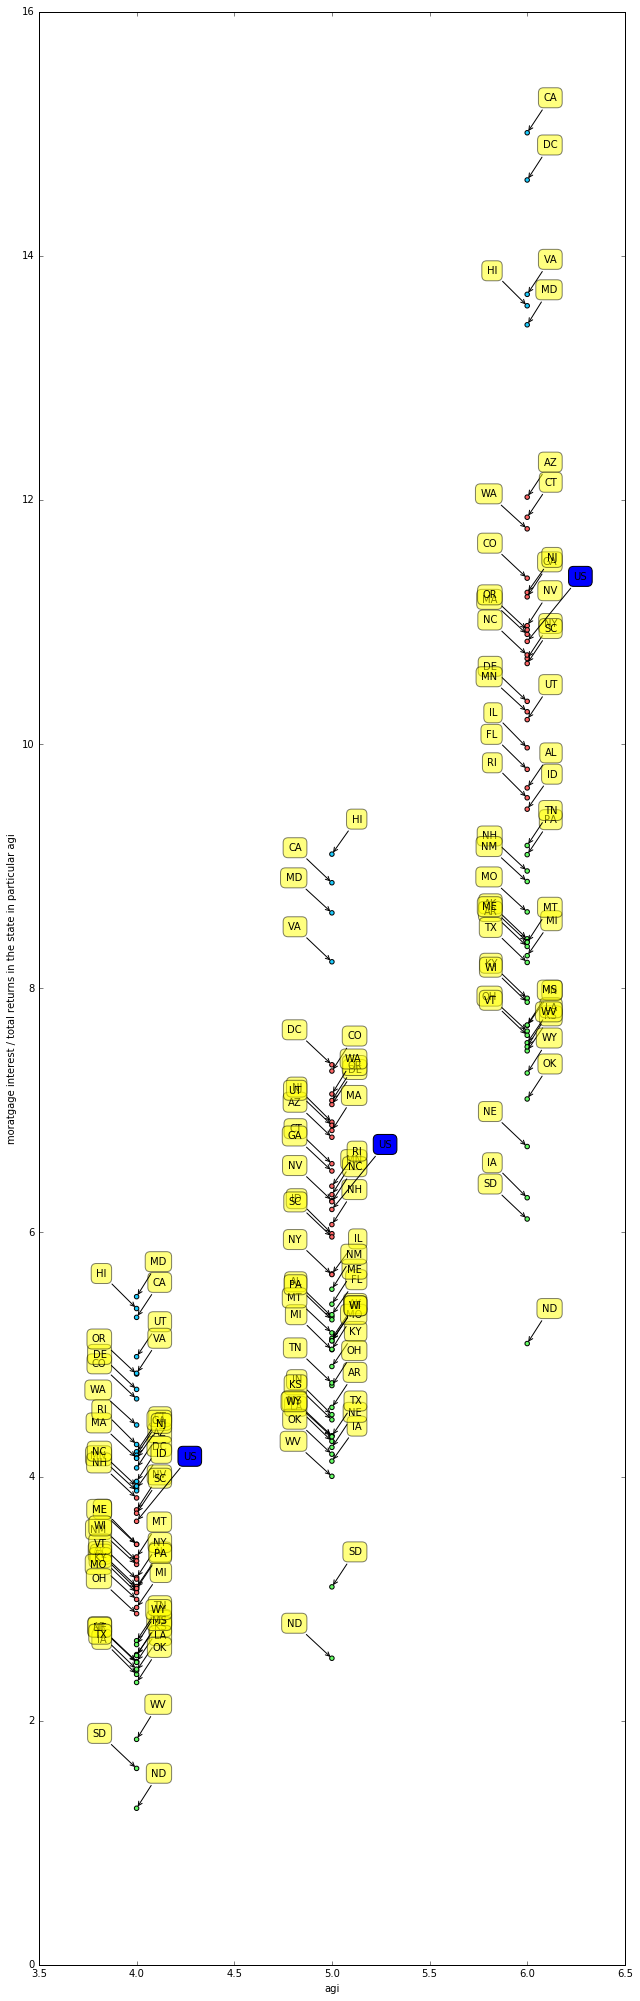

In [255]:
topagiToMor = agiToMor[agiToMor['agi_stub']>3].copy()
topagiToMor = topagiToMor.append(us_complete[us_complete['agi_stub']>3].copy())
colors = ([([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1])[int(i)] for i in topagiToMor['Ncluster'].tolist()])
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 35, forward=True)
ax.scatter(topagiToMor['agi_stub'], topagiToMor['ppm'],c=colors)
ax.set_ylabel('moratgage interest / total returns in the state in particular agi')
ax.set_xlabel('agi')
xytext = (-30,30)
bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5)
for label, x, y in zip(topagiToMor['STATE'], topagiToMor['agi_stub'], topagiToMor['ppm']):
     xytext = (30,30) if xytext == (-30,30) else (-30,30)
     color = 'yellow'
     if label == 'US':
            xytext = (60,60)
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 1)
     plt.annotate(label,xy = (x, y), xytext = xytext,
        textcoords = 'offset points', ha = "right", va = 'bottom',
        bbox = bbox,
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()